In [89]:
import numpy as np
import matplotlib.pyplot as plt

In [90]:
class WinnerTakeAll:
    def __init__(self, n):
        self.n = n
        self.weights = np.random.rand(n, 2)
        self.assigned = []
        self.centeres = None

    def train(self, data, rate=0.01, epochs=100):
        assigned = {}
        for epoch in range(epochs):
            for i, p in enumerate(data):
                o = np.dot(p, self.weights.T)
                ind = np.argmax(o)
                if i not in assigned:
                    assigned[i] = []
                assigned[i].append(ind)
                self.weights[ind] += rate * (p - self.weights[ind])
        for p in assigned.keys():
            self.assigned.append(assigned[p][np.argmax(assigned[p])])

    @staticmethod
    def find_nearest_center(point, centers):
        distances = np.linalg.norm(centers - point, axis=1)
        return np.argmin(distances)
    
    def predict(self, input_pattern):
        o = np.dot(input_pattern, self.weights)
        ind = np.argmax(o)
        winner = np.zeros(self.n)
        winner[ind] = 1
        return winner

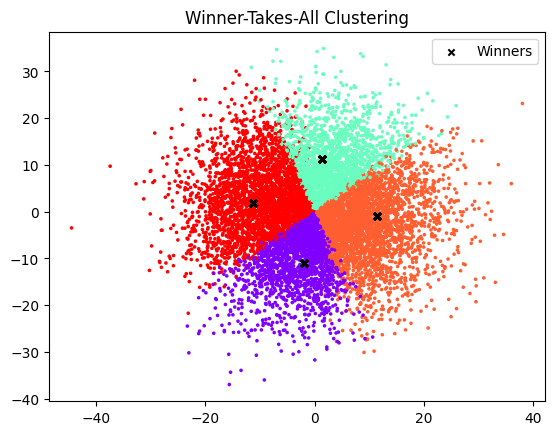

In [98]:
n = 100

np.random.seed(0)
points = 10000
data = np.random.randn(points, 2) * 10

wta = WinnerTakeAll(n)
wta.train(data)

plt.scatter(data[:, 0], data[:, 1], c=wta.assigned, cmap='rainbow', s=10, marker='.')
plt.scatter(wta.weights[wta.assigned][:, 0], wta.weights[wta.assigned][:, 1], c='black', marker='x', s=20, label='Winners')
plt.title('Winner-Takes-All Clustering')
plt.legend()
plt.show()